In [1]:
import pandas as pd
import numpy
import spacy
import matplotlib.pyplot as plt
import base64
import string
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.matcher import PhraseMatcher
from collections import Counter


In [2]:
# pip install wordcloud

In [3]:
# !{sys.executable} -m spacy download en_core_web_sm

In [4]:
df = pd.read_csv("dark_pattern.tsv", sep="\t")
df.tail()

,page_id,text,label,Pattern Category
2351,1304,Bra Panty Set,0,Not Dark Pattern
2352,1038,DressesFootwearHatsHoodies & SweatshirtsJersey...,0,Not Dark Pattern
2353,1081,Only 4 left in stock,1,Scarcity
2354,767,Trending Players,0,Not Dark Pattern
2355,1468,10 Left in stock,1,Scarcity


In [5]:
df['pattern_category'] = df['label'].apply(lambda x: 'dark pattern' if x == 1 else 'not a dark pattern')
df = df.drop(labels = ['page_id', 'Pattern Category', 'label'], axis = 1)
df.head()

,text,pattern_category
0,FLASH SALE | LIMITED TIME ONLY Shop Now,dark pattern
1,Pillowcases & Shams,not a dark pattern
2,Write a review,not a dark pattern
3,"To start your return, simply click on the foll...",not a dark pattern
4,newsletter signup (privacy policy),not a dark pattern


In [6]:
text = df.text.to_string()
pattern_category = df.pattern_category.to_string()

In [7]:
    nlp = spacy.load('en_core_web_sm')
    def spacy_tokenizer(text):
        doc = nlp(text)
        tokens = []
        tokens = [token.lemma_.lower().strip() for token in doc if not token.is_stop and not token.is_punct and not token.like_num and not token.is_space and token.lemma_ != '-PRON-']
        ngrams = zip(*[tokens[i:] for i in range(2)])
        return list(tokens) + ['_'.join(ngram) for ngram in ngrams]

#     def preprocess(text):
#         doc = nlp(text)
#         tokens = []
#         for token in doc:
#             if not token.is_punct and not token.is_space and not token.like_num:
#                 lemma = token.lemma_.lower().strip()
#                 if lemma not in nlp.Defaults.stop_words:
#                     tokens.append(lemma)
                                     
                    
#         return tokens

In [8]:
df['tokens'] = df['text'].apply(spacy_tokenizer)
df = df.drop(labels = ['text'], axis = 1)
df.head(15)

,pattern_category,tokens
0,dark pattern,"[flash, sale, |, limited, time, shop, flash_sa..."
1,not a dark pattern,"[pillowcase, shams, pillowcase_shams]"
2,not a dark pattern,"[write, review, write_review]"
3,not a dark pattern,"[start, return, simply, click, follow, button,..."
4,not a dark pattern,"[newsletter, signup, privacy, policy, newslett..."
5,dark pattern,[demand]
6,not a dark pattern,"[guarantee, door, door, delivery, customer, bu..."
7,dark pattern,"[hurry, leave, stock, hurry_leave, leave_stock]"
8,dark pattern,"[stock, leave, stock_leave]"
9,not a dark pattern,"[international, shipping, policy, internationa..."


In [19]:
# tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer)
# tfidf.fit(df)
# tfidf_vectors = tfidf.transform(df)



In [9]:
# grouped_df = df[df['pattern_category'] == 'dark pattern'].groupby('tokens')
# grouped_df

In [10]:
# df['pattern_category'].value_counts()

In [11]:
# def show_sorted(df):
#     for category, token in zip(df.pattern_category, df.tokens):
#         if (category == 'dark pattern'):
    
        
#     return category, token

In [12]:

# def show_sorted(row):
#     if row['pattern_category'] == 'dark pattern':
#         return row['tokens']
#     else:
#         return None

# df = pd.DataFrame({'pattern_category': ['dark pattern', 'light pattern', 'dark pattern'],
#                    'tokens': ['b', 'a', 'c']})

# dark_patterns = df.apply(show_sorted, axis=1)
# dark_patterns = dark_patterns.dropna()
# sorted_patterns = sorted(dark_patterns)
# print(sorted_patterns)

In [13]:
# def show_sorted(df):
#     dark_patterns = []
#     for category, token in zip(df.pattern_category, df.tokens):
#         if category == 'dark pattern':
#             dark_patterns.append((category, token))
#     sorted_patterns = sorted(dark_patterns, key=lambda x: x[1])
    
    
#     return sorted_patterns


# sort_df = df.apply(show_sorted)

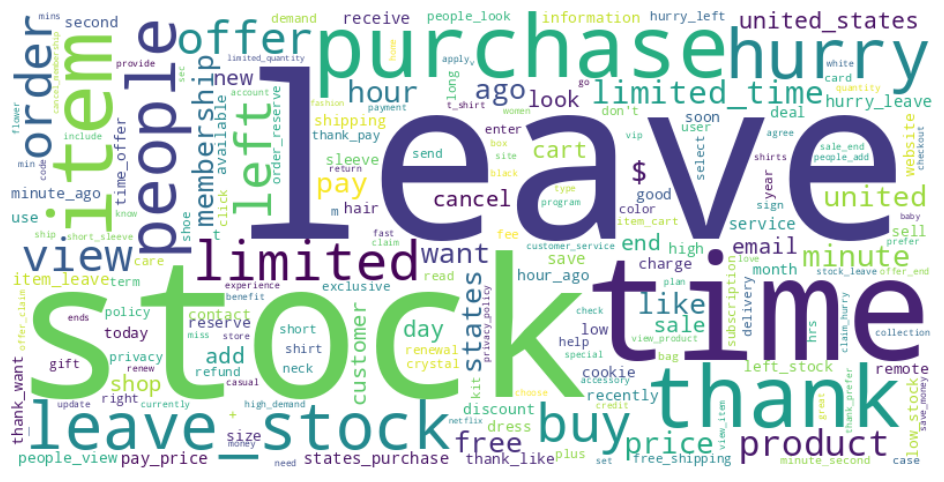

In [14]:
tokens = df['tokens'].sum()
freq = Counter(tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# tfidf = TfidfVectorizer(analyzer='word', 
# token_pattern=r'\w{1,}', max_features=5000)

In [ ]:
#splitting the data into train and validation

In [ ]:
train_x, valid_x, train_y, valid_y = model.selection.train_test_split(df['tokens'], df['pattern_category'])

In [ ]:
#TFIDF feature generation for a maximum of 5000 features

In [ ]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transformer(valid_y)


tfidf_vect = TfidfVectorizer(analyzer='word', 
token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(Email_Data['Email'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
xtrain_tfidf.data

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state=42)
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Training Data Shape: (1578, 2)
Testing Data Shape: (778, 2)
